<center><font size="3"><b>Digital Signal Processing Lab </b></font></center>
<br />
<center><font size="6"><b><u>1 and 2D filters applications</u></b></font></center>
<br />
<br />

# Imports

In [1]:
import scipy.signal
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import numpy as np
import IPython.display as ipd

# Introduction

Digital filters have numerous applications and are very widely used, for example in signal processing, music production, compression, telecommunication, image processing and other. We are going to focus on their basic capabilities concering audio (deleted part) and images.

# Filters with images

We are going to work on the green layer of [Lena](https://en.wikipedia.org/wiki/Lenna) (but we will plot the image with grey colormap).

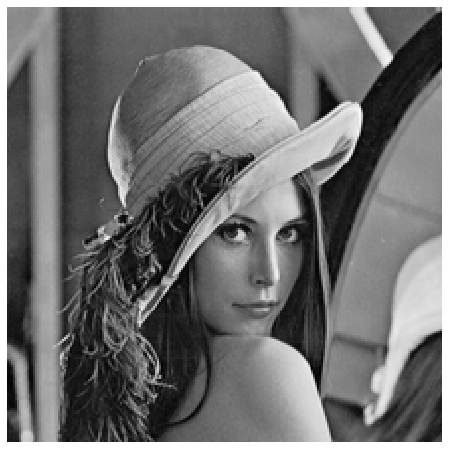

In [3]:
lena = plt.imread('lena.png')[..., 1]

plt.figure(figsize=(10, 8))
plt.imshow(lena, cmap='gray')
plt.axis('off')
plt.show()

## Filtering axis separately

If we want to filert the image, we need to consider that it is a 2D function. One way to do it is to filter the directions of X and Y axis separately.

### Task

Design a FIR filter, store it's impulse response in a variable called `h` and keep the filter length in `N_h`. Convolve the impulse response with Lena along X axis (rows) and place the result in `y_X`, then repeat it for the Y axis (columns) of `y_X` and place the result in `y_XY`. Remember that in the case of image processing the filter should be significantly shorter compared to audio applications (depends on the image size, here it could be 10).

In [39]:
"Your code goes below here."
N_h = 10
fc = 0.4
h = scipy.signal.firwin(N_h, fc, pass_zero='lowpass')
y_image, x_image = lena.shape

y_X = np.zeros((N_h + y_image - 1, N_h + x_image - 1))

for i in range(x_image):
    y_X[i, :] = np.convolve(h, lena[i, :])

y_XY = np.zeros((N_h + y_X.shape[0] - 1, N_h + y_X.shape[1] - 1))

for i in range(y_image):
    y_XY[:, i] = np.convolve(h, y_X[:, i])

The filter frequency response is shown in the cell below.

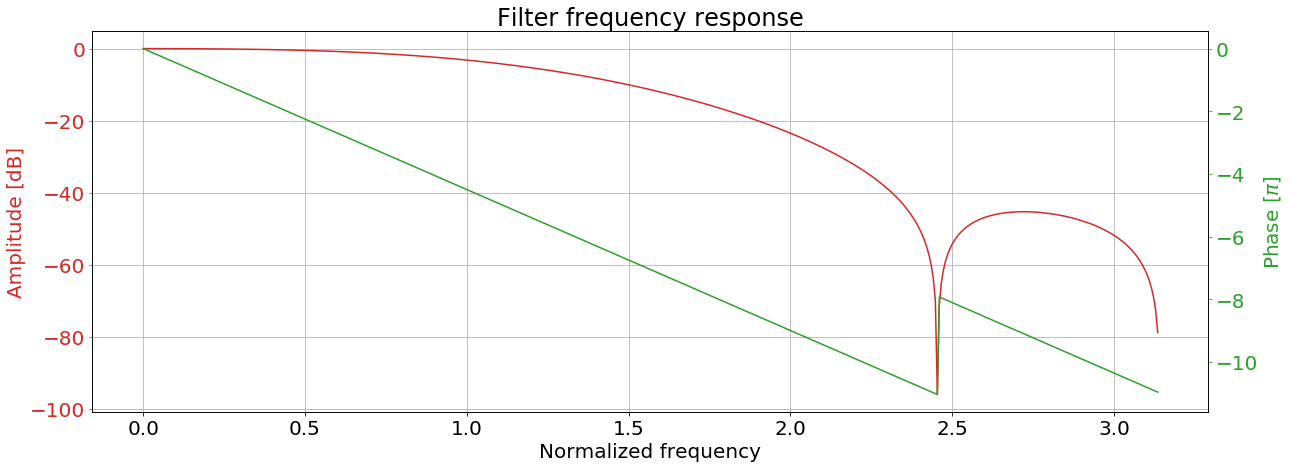

In [40]:
w, H = scipy.signal.freqz(h)
angles = np.unwrap(np.angle(H))


plt.rc('font', size=20)

fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(w, 20*np.log10(abs(H)), 'C3')
ax.grid()
ax.set_title('Filter frequency response')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude [dB]', color='C3')
ax.tick_params(axis='y', colors='C3')

ax2 = ax.twinx()
ax2.plot(w, angles, 'C2')
ax2.set_ylabel('Phase [$\pi$]', color='C2')
ax2.tick_params(axis='y', colors='C2')

fig.show()

The filtered images are shown in the next cell.

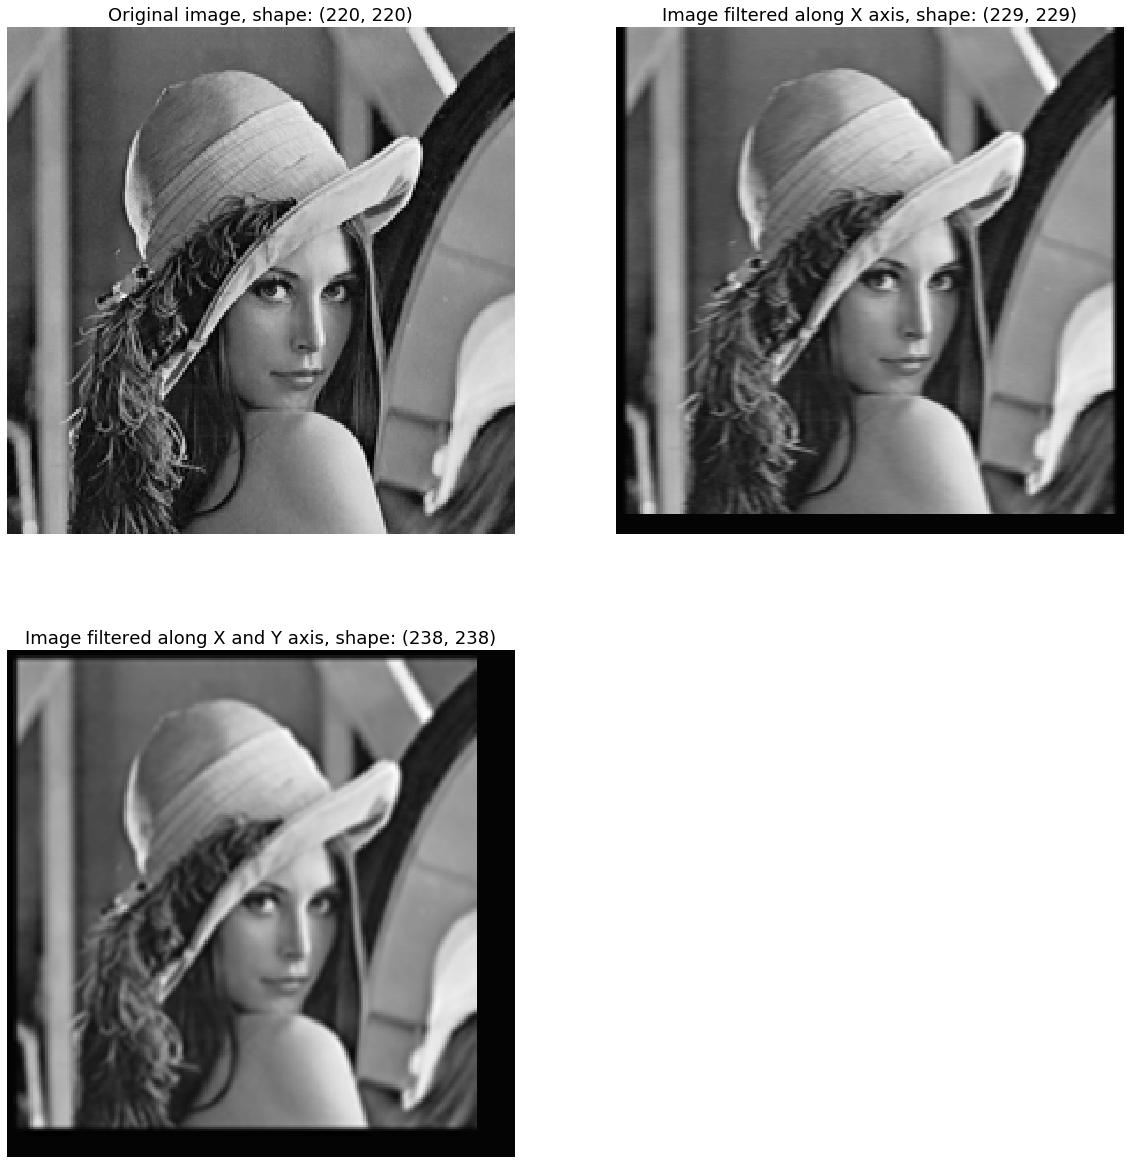

In [41]:
plt.rc('font', size=15)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(21)
fig.set_figwidth(20)

ax[0, 0].imshow(lena, cmap='gray')
ax[0, 0].set_title('Original image, shape: ' + str(lena.shape))
ax[0, 0].axis('off')

ax[0, 1].imshow(y_X, cmap='gray')
ax[0, 1].set_title('Image filtered along X axis, shape: ' + str(y_X.shape))
ax[0, 1].axis('off')

ax[1, 0].imshow(y_XY, cmap='gray')
ax[1, 0].set_title('Image filtered along X and Y axis, shape: ' + str(y_XY.shape))
ax[1, 0].axis('off')

ax[1, 1].axis('off')

fig.show()

The final image got bigger because it is now surrounded with a black frame. This is the result of the assumption that the values beyond the image border are equal to zero (similarly to 1D convolution). Try different types of filter, cutoff frequencies and filter lengths (see what happens when the filter is too long).

## 2D DFT

Now we will focus on the 2D DFT, understanding of which is necessary for topics introduced later on. The matrix form of 2D DFT is given by:<br>
<br>
$$\large
    \mathbf{X} = \mathbf{W_Y} \mathbf{x} 
    \mathbf{W_X},
$$
<br>
where ${\mathbf{x}} \in \mathbb{C}^{X\times{}Y}$ is a 2D function (for example an image), ${\mathbf{X}} \in \mathbb{C}^{X\times{}Y}$ is the 2D DFT and ${\mathbf{W_Y}} \in \mathbb{C}^{Y\times{}Y}$ and ${\mathbf{W_X}} \in \mathbb{C}^{X\times{}X}$ are the DFT matrices for X and Y axis, respectively.

### Task

Complete the function below. It should perform the 2D DFT according to the formula above.

In [8]:
def dft2(x):
    """
    This function performs the 2D DFT. 
    
    Parameters:
        x - An input array.
    
    Returns:
        X - 2D DFT of the input array.
    """
    y_rows, x_cols = x.shape
    
    n_y = np.arange(y_rows)
    k_y = n_y.reshape((y_rows,1))
    Wy = np.exp(-1j * 2 * np.pi * k_y * n_y / y_rows) 
    
    n_x = np.arange(x_cols)
    k_x = n_x.reshape((x_cols, 1))
    Wx = np.exp(-1j * 2 * np.pi * k_x * n_x / x_cols)
    
    X = Wy @ x @ Wx
    return X

Now, we will compute the 2D DFT of Lena in the cell below...

In [9]:
X_dft2 = dft2(lena)
X_fft2 = np.fft.fft2(lena)

... and see if your function produces the same result as numpy.

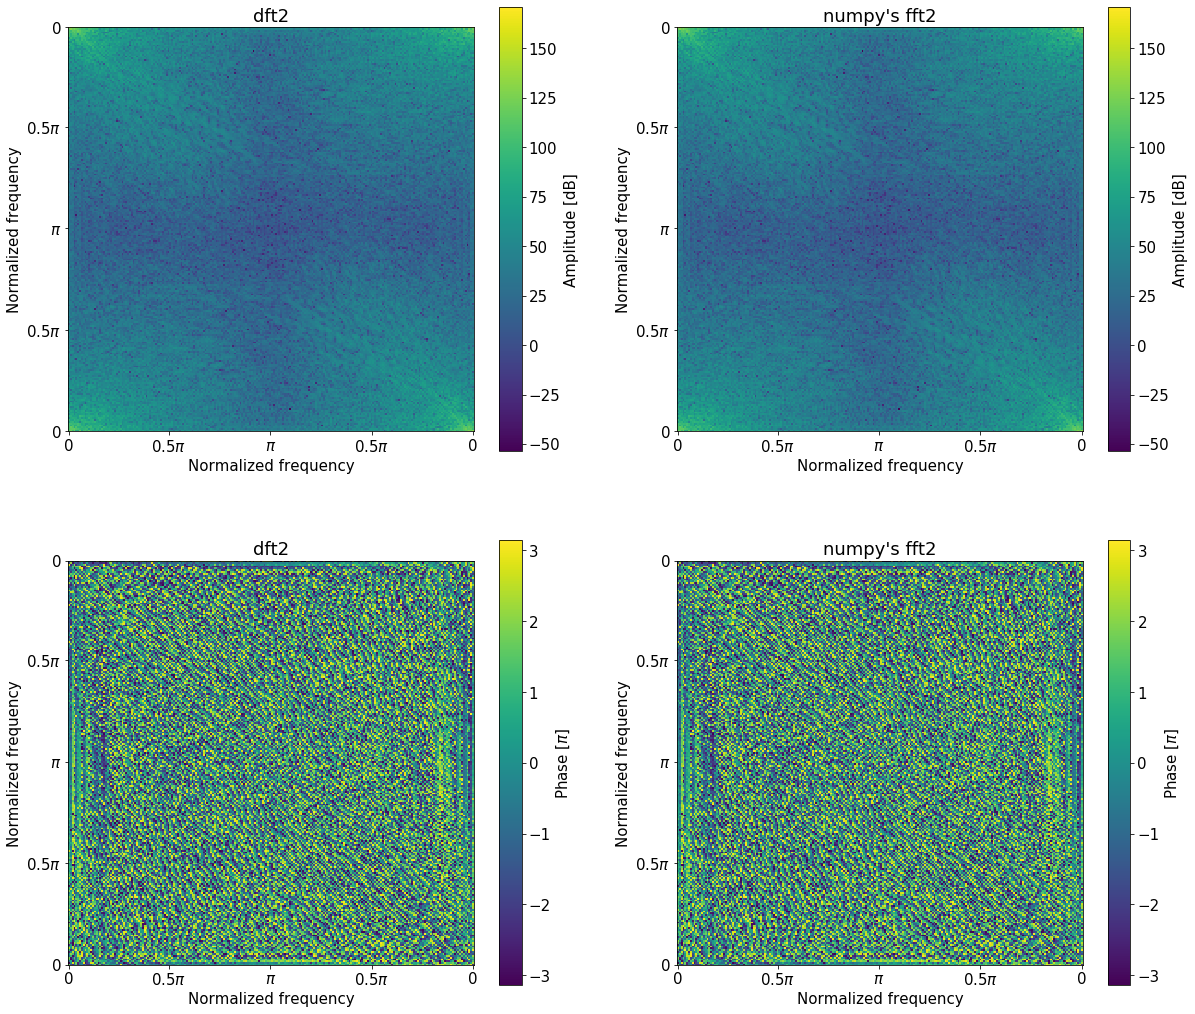

In [10]:
N_Y, N_X = lena.shape

plt.rc('font', size=15)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(18)
fig.set_figwidth(20)

im = ax[0, 0].imshow(20*np.log10(np.abs(X_dft2)**2))
ax[0, 0].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[0, 0].set_xlabel(r'Normalized frequency')
ax[0, 0].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 0].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[0, 0].set_ylabel('Normalized frequency')
ax[0, 0].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 0].set_title('dft2')
cbar = plt.colorbar(im, ax=ax[0, 0])
cbar.set_label('Amplitude [dB]')

im = ax[0, 1].imshow(20*np.log10(np.abs(X_fft2)**2))
ax[0, 1].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[0, 1].set_xlabel('Normalized frequency')
ax[0, 1].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[0, 1].set_ylabel('Normalized frequency')
ax[0, 1].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_title("numpy's fft2")
cbar = plt.colorbar(im, ax=ax[0, 1])
cbar.set_label('Amplitude [dB]')

im = ax[1, 0].imshow(np.angle(X_dft2))
ax[1, 0].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[1, 0].set_xlabel('Normalized frequency')
ax[1, 0].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[1, 0].set_ylabel('Normalized frequency')
ax[1, 0].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_title('dft2')
cbar = plt.colorbar(im, ax=ax[1, 0])
cbar.set_label('Phase [$\pi$]')

im = ax[1, 1].imshow(np.angle(X_fft2))
ax[1, 1].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[1, 1].set_xlabel('Normalized frequency')
ax[1, 1].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 1].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[1, 1].set_ylabel('Normalized frequency')
ax[1, 1].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 1].set_title("numpy's fft2")
cbar = plt.colorbar(im, ax=ax[1, 1])
cbar.set_label('Phase [$\pi$]')

plt.show()

Usually the zero frequency is placed at the center (kind of like in the 1D case). We can do it with numpy's `fftshift`.

In [ ]:
X_dft2 = np.fft.fftshift(X_dft2)
X_fft2 = np.fft.fftshift(X_fft2)

In [ ]:
plt.rc('font', size=15)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(18)
fig.set_figwidth(20)

im = ax[0, 0].imshow(20*np.log10(np.abs(X_dft2)**2))
ax[0, 0].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[0, 0].set_xlabel('Normalized frequency')
ax[0, 0].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 0].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[0, 0].set_ylabel('Normalized frequency')
ax[0, 0].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 0].set_title('dft2')
cbar = plt.colorbar(im, ax=ax[0, 0])
cbar.set_label('Amplitude [dB]')

im = ax[0, 1].imshow(20*np.log10(np.abs(X_fft2)**2))
ax[0, 1].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[0, 1].set_xlabel('Normalized frequency')
ax[0, 1].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[0, 1].set_ylabel('Normalized frequency')
ax[0, 1].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_title("numpy's fft2")
cbar = plt.colorbar(im, ax=ax[0, 1])
cbar.set_label('Amplitude [dB]')

im = ax[1, 0].imshow(np.angle(X_dft2))
ax[1, 0].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[1, 0].set_xlabel('Normalized frequency')
ax[1, 0].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[1, 0].set_ylabel('Normalized frequency')
ax[1, 0].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_title('dft2')
cbar = plt.colorbar(im, ax=ax[1, 0])
cbar.set_label('Phase [$\pi$]')

im = ax[1, 1].imshow(np.angle(X_fft2))
ax[1, 1].set_xticks([0, (N_X-1)//4, (N_X-1)//2, 3*(N_X-1)//4, N_X-1])
ax[1, 1].set_xlabel('Normalized frequency')
ax[1, 1].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 1].set_yticks([0, (N_Y-1)//4, (N_Y-1)//2, 3*(N_Y-1)//4, N_Y-1])
ax[1, 1].set_ylabel('Normalized frequency')
ax[1, 1].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 1].set_title("numpy's fft2")
cbar = plt.colorbar(im, ax=ax[1, 1])
cbar.set_label('Phase [$\pi$]')

plt.show()

## 2D FIR filter

The 2D impulse response $\mathbf{h_{2D}}$ of a FIR filter (also called "kernel") can be obtained according to:
$$\large
    \mathbf{h_{2D}}[i,j] = \mathbf{p}[i]\mathbf{p}[j],
$$
where $\mathbf{p}$ is the impulse response of a prototype filter.
<p style="font-size: 4pt;">Psst, this looks like outer product...</p>

### Task

Design a 2D FIR filter and place the impulse response in a variable called `h_2D`. The prototype filter impulse response should be placed in variable called `p` and it's length in `N_p`.

In [30]:
"Your code goes below here."
N_p = 20
fc = 0.5
p = scipy.signal.firwin(N_p, fc, pass_zero='lowpass')

h_2D = np.outer(p, p)

Once you are finished, look at the prototype filter frequency response in the cell below. Then go to the next cell and look at the 2D filter coefficients and it's magnitude response.

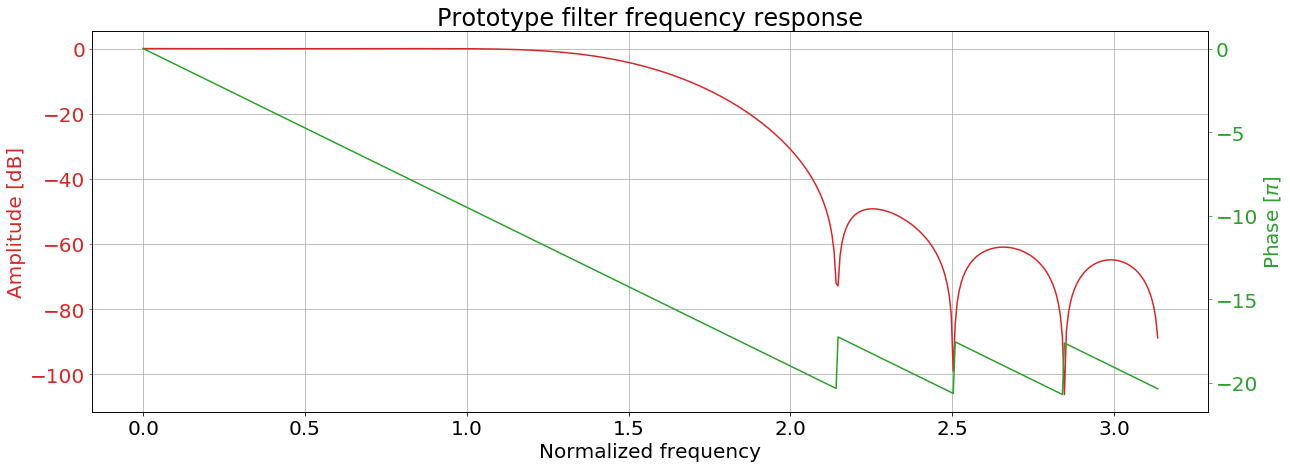

In [31]:
w, P = scipy.signal.freqz(p)
angles = np.unwrap(np.angle(P))


plt.rc('font', size=20)

fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(w, 20*np.log10(abs(P)), 'C3')
ax.grid()
ax.set_title('Prototype filter frequency response')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude [dB]', color='C3')
ax.tick_params(axis='y', colors='C3')

ax2 = ax.twinx()
ax2.plot(w, angles, 'C2')
ax2.set_ylabel('Phase [$\pi$]', color='C2')
ax2.tick_params(axis='y', colors='C2')

fig.show()

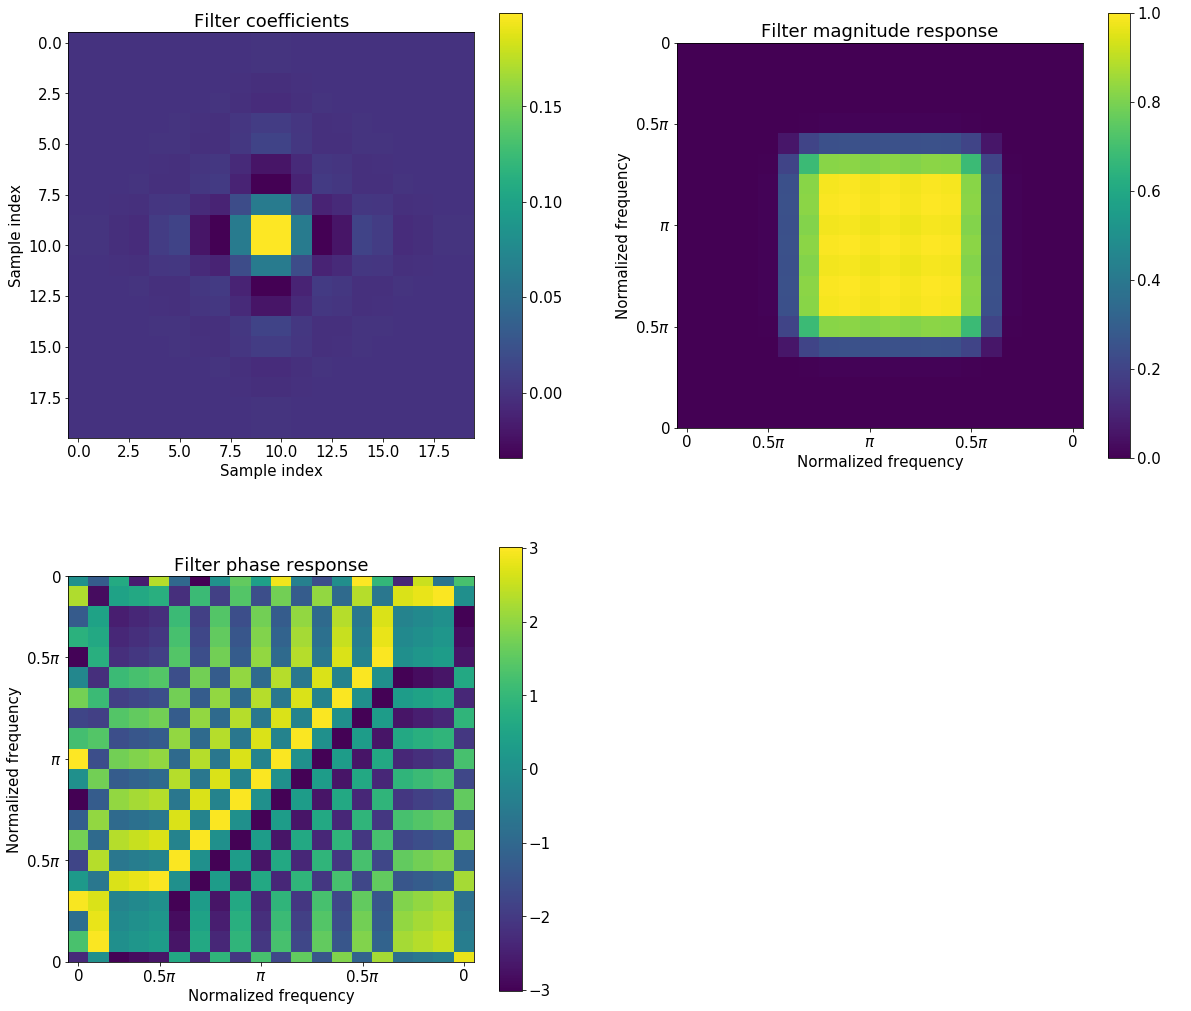

In [32]:
H_2D = np.fft.fft2(h_2D)
H_2D = np.fft.fftshift(H_2D)


plt.rc('font', size=15)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(18)
fig.set_figwidth(20)

im = ax[0, 0].imshow(h_2D)
ax[0, 0].set_xlabel('Sample index')
ax[0, 0].set_ylabel('Sample index')
ax[0, 0].set_title('Filter coefficients')
plt.colorbar(im, ax=ax[0, 0])

im = ax[0, 1].imshow(np.abs(H_2D)**2)
ax[0, 1].set_xticks([0, (N_p-1)//4, (N_p-1)//2, 3*(N_p-1)//4, N_p-1])
ax[0, 1].set_xlabel('Normalized frequency')
ax[0, 1].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_yticks([0, (N_p-1)//4, (N_p-1)//2, 3*(N_p-1)//4, N_p-1])
ax[0, 1].set_ylabel('Normalized frequency')
ax[0, 1].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_title('Filter magnitude response')
plt.colorbar(im, ax=ax[0, 1])

im = ax[1, 0].imshow(np.angle(H_2D))
ax[1, 0].set_xticks([0, (N_p-1)//4, (N_p-1)//2, 3*(N_p-1)//4, N_p-1])
ax[1, 0].set_xlabel('Normalized frequency')
ax[1, 0].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_yticks([0, (N_p-1)//4, (N_p-1)//2, 3*(N_p-1)//4, N_p-1])
ax[1, 0].set_ylabel('Normalized frequency')
ax[1, 0].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_title('Filter phase response')
plt.colorbar(im, ax=ax[1, 0])

ax[1, 1].axis('off')

plt.show()

Try designing different filter `h2_D` by changing the prototype filter's `p` type, cutoff frequency and length.

## Discrete 2D convolution

To apply a 2D filter to an image, we first need to understand how does the discrete 2D convolution work. It is given by:
$$\large
    \mathbf{f}[i,j] * \mathbf{g}[i,j]
    =
    \sum_{k=-\infty}^{\infty}
    \sum_{l=-\infty}^{\infty}
    \mathbf{f}[k,l]
    \mathbf{g}[i-k,j-l]
$$
Assume a 2D impulse response $\mathbf{h_{2D}}$ and an image $\mathbf{x}$ shown below.

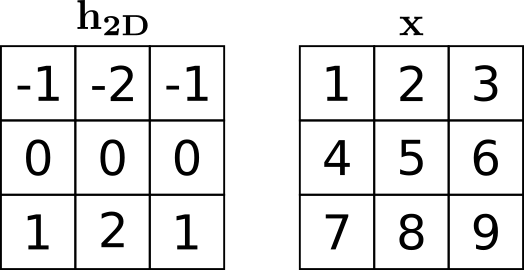

The steps necessary to filter the image $\mathbf{x}$ with the 2D filter impulse response $\mathbf{h_{2D}}$ are:
   1. Double flip the 2D impulse response matrix

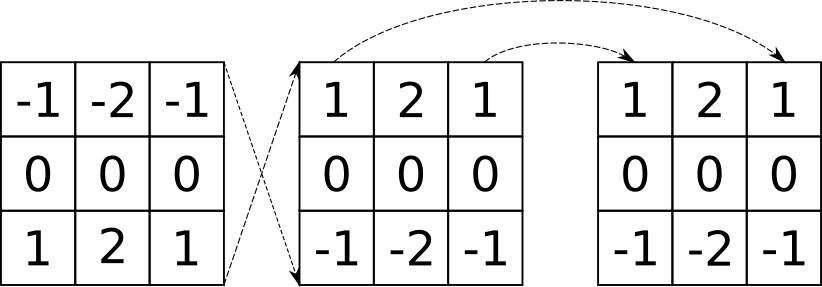

   2. Slide the kernel over the image and perform the MAC (Multiply-Accumulate) operation at each instant

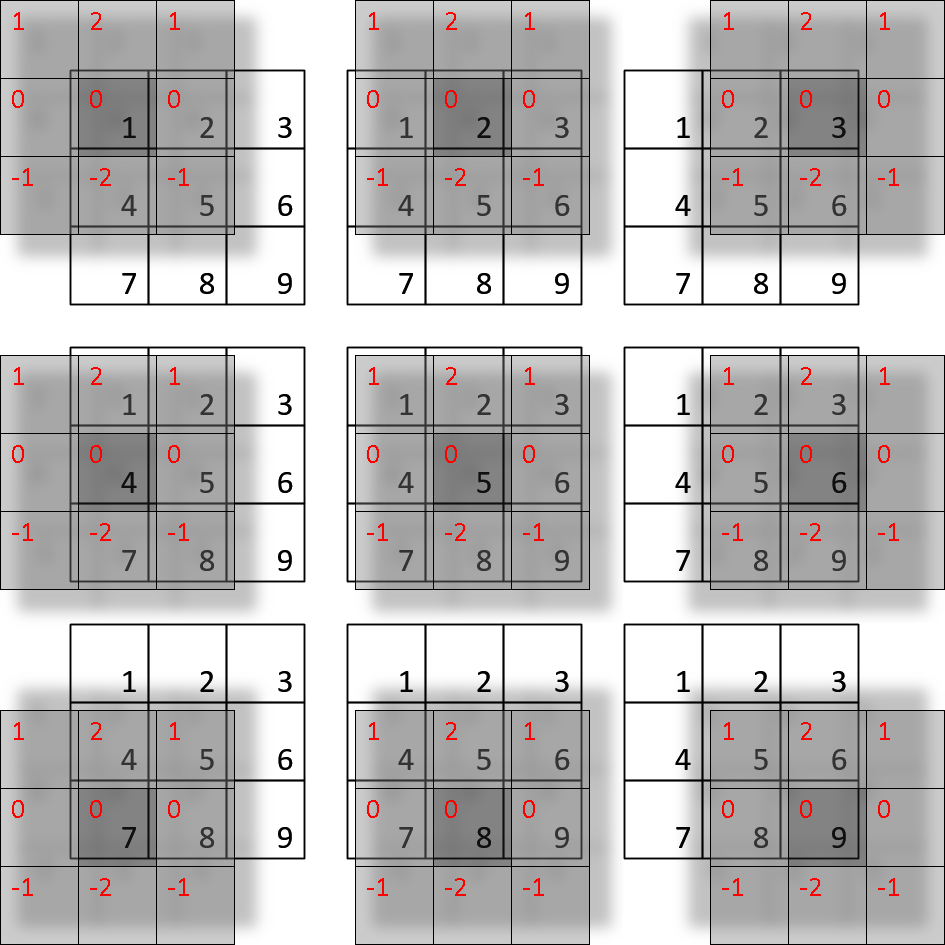

At each setup the filter coefficients are multiplied with the image values, above which they 'hover'. The reults are then summed and the final value is placed in the new image, in the same spot above which the central filter coefficitent was 'hovering'. If it is unclear, [here](http://www.songho.ca/dsp/convolution/convolution2d_example.html) is a nice example (the last image was taken from there). We are going to focus on a simplest case when the kernel is a <b>square matrix with a central value</b>, meaning that the prototype filter must have an odd number of elements.<br>
<br>
Since the image is not infinite, we are going to run out of values at the edges. There are different approaches to handle this problem:
- avoiding going over the border (results in a smaller image)
- assuming values beyond the border are equal to zero or other constant value (similarly to 1D filtering)
- symmetrically reflecting the image along the edge
- assuming the image is periodic.<br>

### Task

Complete the function below. It should perform the 2D convolution with zero padding.

In [14]:
def conv2(x, h):
    """
    This function performs the 2D convolution. 
    
    Parameters:
        x - An input array.
        h - 2D impulse response (kernel).
    Returns:
        y - 2D convolution of x and h.
    """
    y_kernel, x_kernel = h.shape
    y_image, x_image = x.shape
    n_y = y_image - y_kernel + 1
    n_x = x_image - x_kernel + 1
    y = np.zeros((n_y,n_x))
    
    for i in range(n_y):
        for j in range(n_x):
            y[i][j] = np.sum(x[i:i+y_kernel, j:j+x_kernel]*h)
            
    return y

Filter the image with the previosuly designed filter `h_2D` in the cell below...

In [16]:
y_conv2 = conv2(lena, h_2D)

y_scipy = scipy.signal.convolve2d(lena, h_2D, mode='full', boundary='fill')

...and check if the resut your function matches the result of scipy in the cell below.

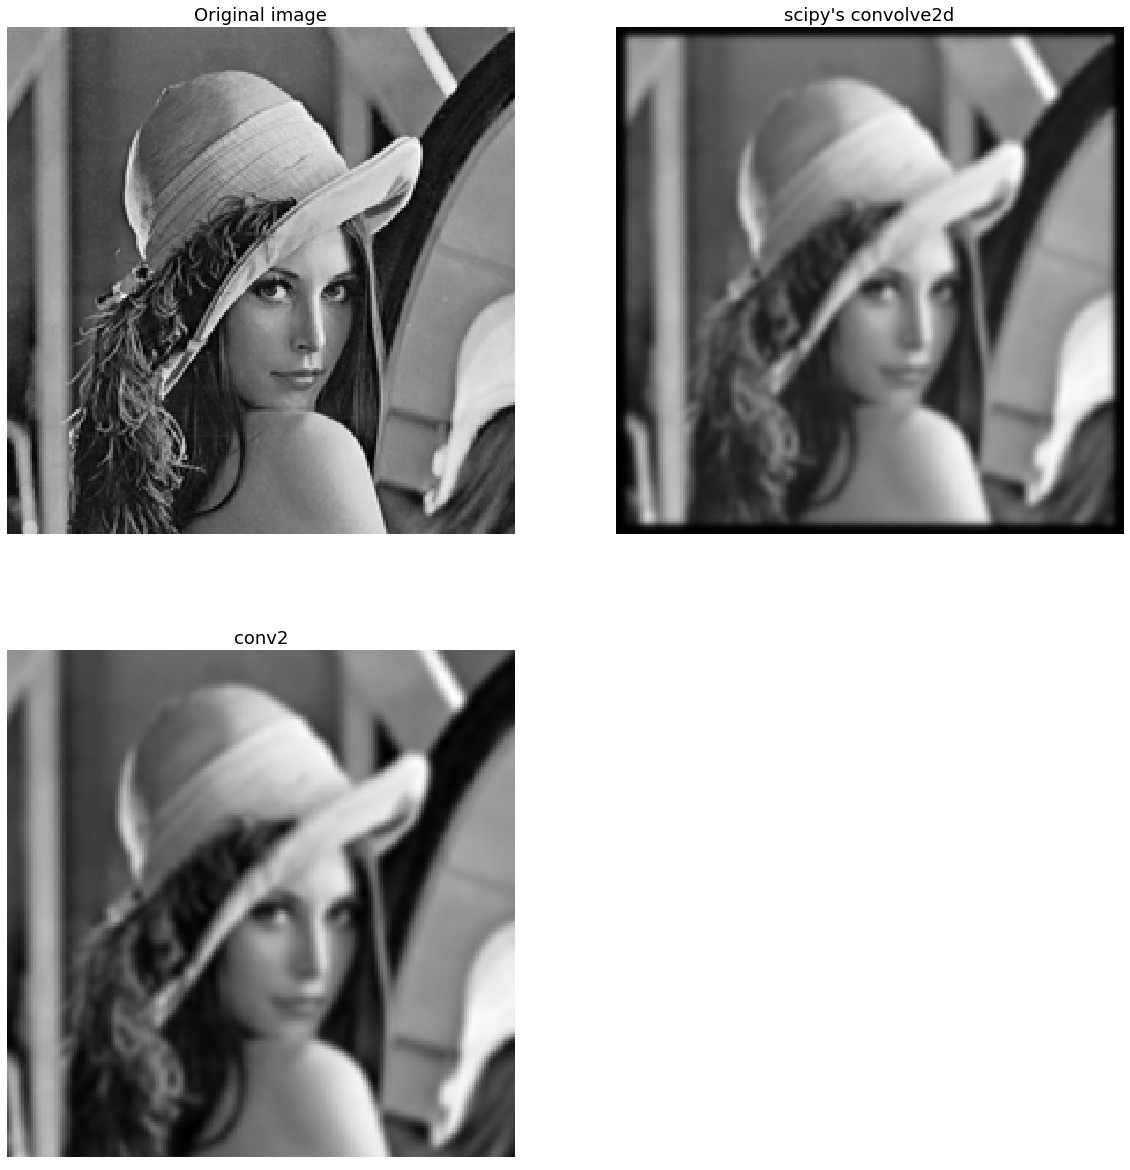

In [17]:
plt.rc('font', size=15)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(21)
fig.set_figwidth(20)

ax[0, 0].imshow(lena, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 0].axis('off')

ax[0, 1].imshow(y_scipy, cmap='gray')
ax[0, 1].set_title("scipy's convolve2d")
ax[0, 1].axis('off')

ax[1, 0].imshow(y_conv2, cmap='gray')
ax[1, 0].set_title('conv2')
ax[1, 0].axis('off')

ax[1, 1].axis('off')

plt.show()

The results of other approaches to image borders are shown below.

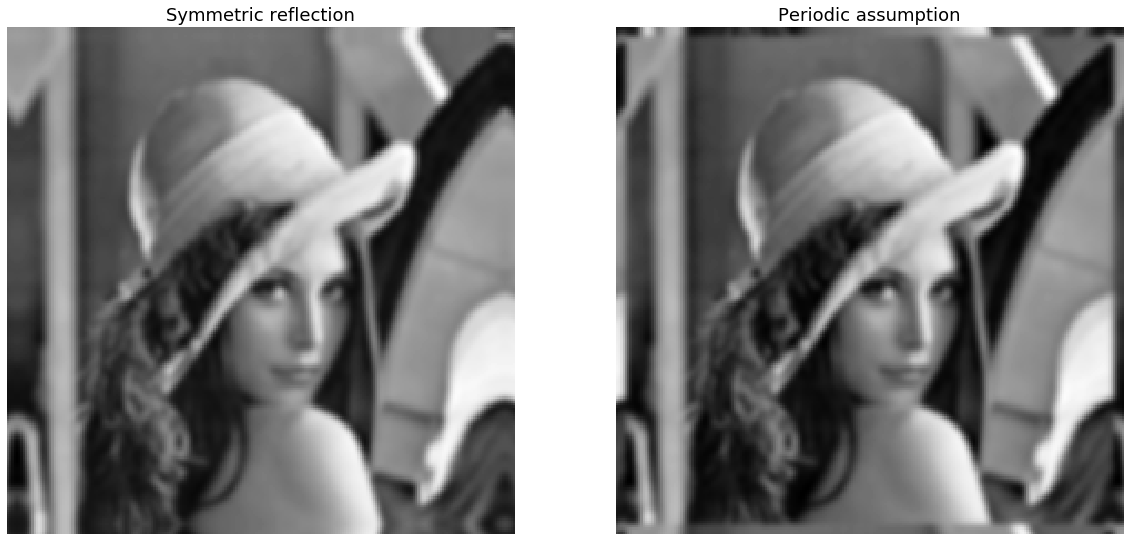

In [19]:
symm = scipy.signal.convolve2d(lena, h_2D, mode='full', boundary='symm')
wrap = scipy.signal.convolve2d(lena, h_2D, mode='full', boundary='wrap')


plt.rc('font', size=15)

fig, ax = plt.subplots(1, 2)

fig.set_figheight(14)
fig.set_figwidth(20)

ax[0].imshow(symm, cmap='gray')
ax[0].set_title('Symmetric reflection')
ax[0].axis('off')

ax[1].imshow(wrap, cmap='gray')
ax[1].set_title('Periodic assumption')
ax[1].axis('off')

plt.show()

Try different filter `h2_D` by changing the prototype filter's `p` type, cutoff frequency and length (see what happens when the filter is very long). 

### Task 

We can also specify different filters for X and Y axis simply by using appropriate prototype filters. Design a 2D FIR filter that removes low frequencies along X axis and high frequencies along Y axis. Place the impulse response in a variable called `h_2DXY` the prototype filters impulse responses should be placed in variable scalled `p_X` and `p_Y`, for the X and Y axis, respetively. Keep the filter length in `N_pXY`.

In [27]:
"Your code goes below here."
N_pXY = 37

p_X = scipy.signal.firwin(N_pXY, 0.2, pass_zero='highpass')
p_Y = scipy.signal.firwin(N_pXY, 0.5, pass_zero='lowpass')

h_2DXY = np.outer(p_X, p_Y)

Look at the prototype filters frequency responses in the cell below. Then go to the next cell and look at the 2D filter coefficients and it's magnitude response.

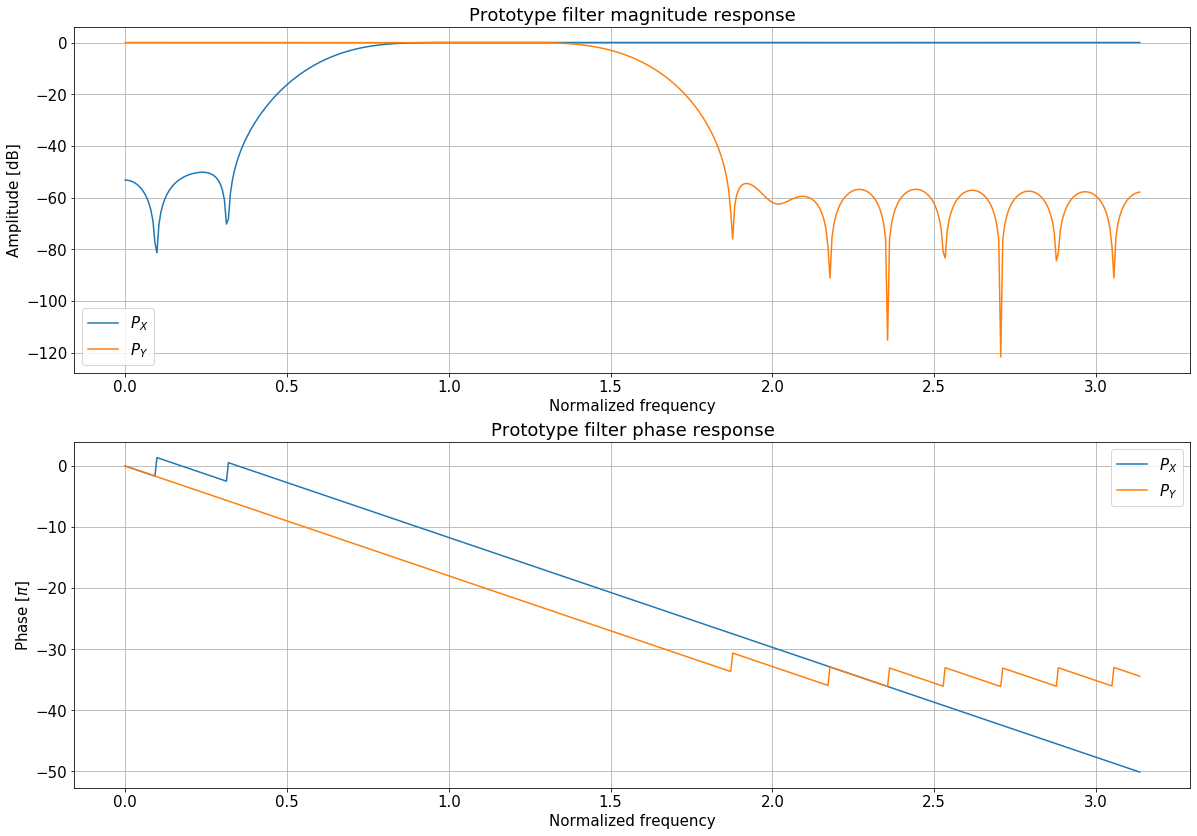

In [28]:
w_X, P_X = scipy.signal.freqz(p_X)
angles_X = np.unwrap(np.angle(P_X))

w_Y, P_Y = scipy.signal.freqz(p_Y)
angles_Y = np.unwrap(np.angle(P_Y))


plt.rc('font', size=15)

fig, ax = plt.subplots(2, 1, figsize=(20, 14))

ax[0].plot(w_X, 20*np.log10(np.abs(P_X)), label='$P_X$')
ax[0].plot(w_Y, 20*np.log10(np.abs(P_Y)), label='$P_Y$')
ax[0].set_title('Prototype filter magnitude response')
ax[0].set_xlabel('Normalized frequency')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].grid()
ax[0].legend()

ax[1].plot(w_X, angles_X, label='$P_X$')
ax[1].plot(w_Y, angles_Y, label='$P_Y$')
ax[1].set_title('Prototype filter phase response')
ax[1].set_xlabel('Normalized frequency')
ax[1].set_ylabel('Phase [$\pi$]')
ax[1].grid()
ax[1].legend()

fig.show()

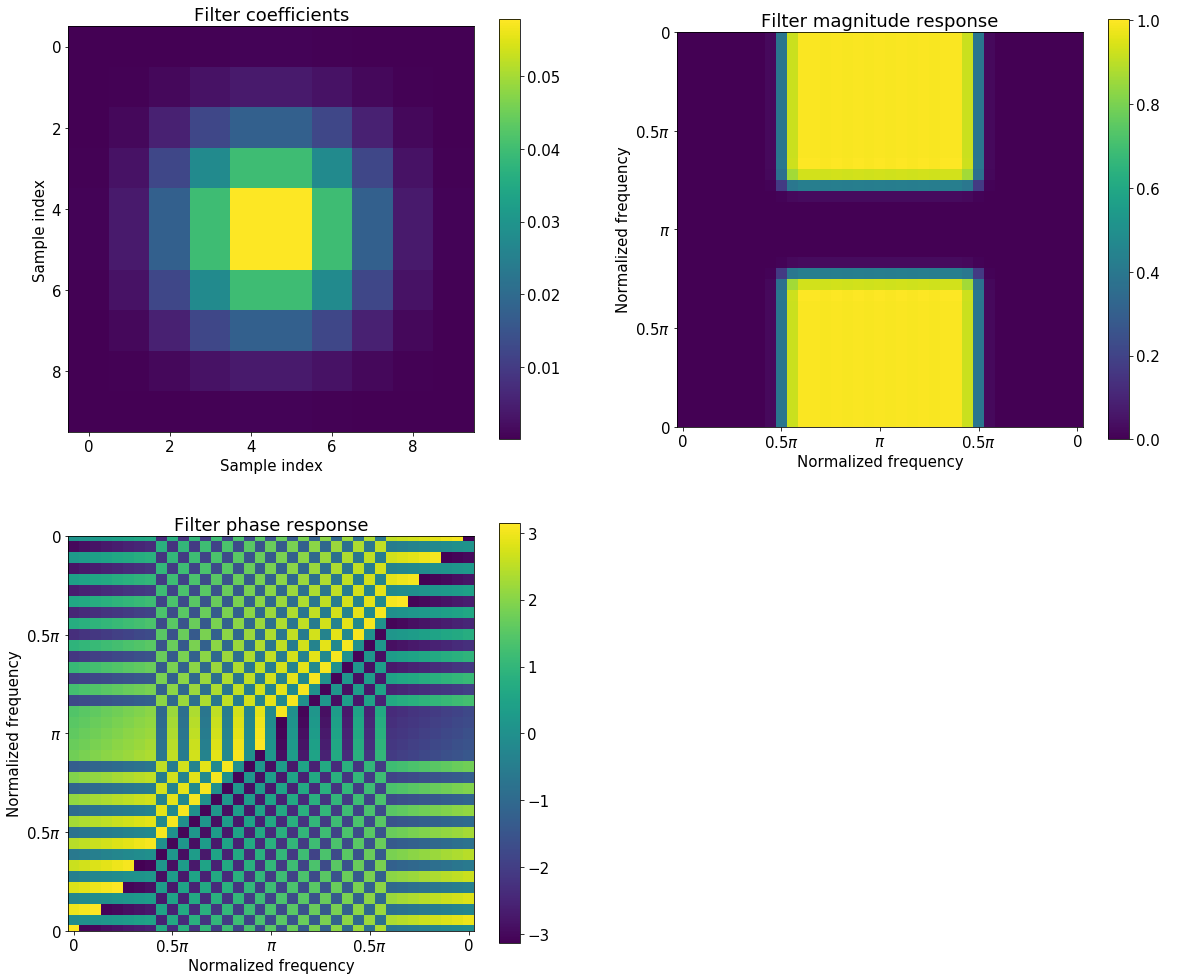

In [29]:
H_2D = np.fft.fft2(h_2DXY)
H_2D = np.fft.fftshift(H_2D)


plt.rc('font', size=15)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(17)
fig.set_figwidth(20)

im = ax[0, 0].imshow(h_2D)
ax[0, 0].set_xlabel('Sample index')
ax[0, 0].set_ylabel('Sample index')
ax[0, 0].set_title('Filter coefficients')
plt.colorbar(im, ax=ax[0, 0])

im = ax[0, 1].imshow(np.abs(H_2D)**2)
ax[0, 1].set_xticks([0, (N_pXY-1)//4, (N_pXY-1)//2, 3*(N_pXY-1)//4, N_pXY-1])
ax[0, 1].set_xlabel('Normalized frequency')
ax[0, 1].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_yticks([0, (N_pXY-1)//4, (N_pXY-1)//2, 3*(N_pXY-1)//4, N_pXY-1])
ax[0, 1].set_ylabel('Normalized frequency')
ax[0, 1].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[0, 1].set_title('Filter magnitude response')
plt.colorbar(im, ax=ax[0, 1])

im = ax[1, 0].imshow(np.angle(H_2D))
ax[1, 0].set_xticks([0, (N_pXY-1)//4, (N_pXY-1)//2, 3*(N_pXY-1)//4, N_pXY-1])
ax[1, 0].set_xlabel('Normalized frequency')
ax[1, 0].set_xticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_yticks([0, (N_pXY-1)//4, (N_pXY-1)//2, 3*(N_pXY-1)//4, N_pXY-1])
ax[1, 0].set_ylabel('Normalized frequency')
ax[1, 0].set_yticklabels(['0', r'0.5$\pi$', r'$\pi$', r'0.5$\pi$', '0'])
ax[1, 0].set_title('Filter phase response')
plt.colorbar(im, ax=ax[1, 0])

ax[1, 1].axis('off')

plt.rc('font', size=15)
plt.show()

Filter the image.

In [ ]:
fill = scipy.signal.convolve2d(lena, h_2DXY, mode='same', boundary='fill')
symm = scipy.signal.convolve2d(lena, h_2DXY, mode='same', boundary='symm')
wrap = scipy.signal.convolve2d(lena, h_2DXY, mode='same', boundary='wrap')

And the results are below. This time the images are cropped, so they are the same size as the original image (no additional borders).

In [ ]:
plt.rc('font', size=15)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(21)
fig.set_figwidth(20)

ax[0, 0].imshow(lena, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 0].axis('off')

ax[0, 1].imshow(fill, cmap='gray')
ax[0, 1].set_title('Filtered image - zero padding')
ax[0, 1].axis('off')

ax[1, 0].imshow(symm, cmap='gray')
ax[1, 0].set_title('Filtered image - symmetric reflection')
ax[1, 0].axis('off')

ax[1, 1].imshow(wrap, cmap='gray')
ax[1, 1].set_title('Filtered image - periodic assumption')
ax[1, 1].axis('off')

plt.show()

Try designing different filter `h_2DXY` by changing the prototype filters `p_X` and `p_Y` types, cutoff frequencies and lengths.